In [49]:
import pandas as pd 
#import pandas_datareader as pdr  
import yfinance as yf
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb 
import math
sb.set()


In [50]:
ticker = input("Enter the ticker of the stock you want to analyze (i.e. ^SPX, AAPL): ")
start = input("Enter the starting date for daily returns data in format YYYY-MM-DD")
end = input("Enter the ending date for daily returns data in format YYYY-MM-DD")
divs_of_subarr = int(input("Enter the number of subarrays as used in the algorithm"))
return_type = 'Adj Close'

In [51]:
raw_data = yf.download(ticker, start , end)
data = raw_data.pct_change()[1:].filter([return_type]) # calculated daily return
# raw_data['Price_Difference'] = raw_data['Close'] - raw_data['Open'] # calculated daily return
# data = raw_data[['Price_Difference']]
# We will use the column for Adjusted Close as the column to base our calculations upon
print(data)

[*********************100%%**********************]  1 of 1 completed

            Adj Close
Date                 
2020-01-03   0.016202
2020-01-06   0.010973
2020-01-07   0.003576
2020-01-08  -0.009161
2020-01-09  -0.003660
...               ...
2023-12-22   0.008827
2023-12-26   0.000535
2023-12-27   0.011515
2023-12-28  -0.003843
2023-12-29  -0.005545

[1006 rows x 1 columns]


In [52]:
data_length = len(data)
print(data_length)

1006


In [53]:
regions_to_analyze = []

for i in range(0, divs_of_subarr):
    num_of_subarrays = 2**i
    min_size = data_length // num_of_subarrays
    remainder = data_length % num_of_subarrays
    
    current_region = []
    start_index = 0
    # Distribute the remainder by adding an extra element to some subarrays
    for i in range(num_of_subarrays):
        size = min_size + (1 if i < remainder else 0)
        current_region.append( data.iloc[start_index:start_index+size])
        start_index += size
    
    regions_to_analyze.append(current_region)
        
for region in regions_to_analyze:
    print(len(region))
    print(region)

1
[            Adj Close
Date                 
2020-01-03   0.016202
2020-01-06   0.010973
2020-01-07   0.003576
2020-01-08  -0.009161
2020-01-09  -0.003660
...               ...
2023-12-22   0.008827
2023-12-26   0.000535
2023-12-27   0.011515
2023-12-28  -0.003843
2023-12-29  -0.005545

[1006 rows x 1 columns]]
2
[            Adj Close
Date                 
2020-01-03   0.016202
2020-01-06   0.010973
2020-01-07   0.003576
2020-01-08  -0.009161
2020-01-09  -0.003660
...               ...
2021-12-23   0.005329
2021-12-27  -0.001712
2021-12-28   0.001161
2021-12-29  -0.002817
2021-12-30   0.004210

[503 rows x 1 columns],             Adj Close
Date                 
2021-12-31   0.008165
2022-01-03  -0.015376
2022-01-04   0.008114
2022-01-05   0.005843
2022-01-06  -0.019676
...               ...
2023-12-22   0.008827
2023-12-26   0.000535
2023-12-27   0.011515
2023-12-28  -0.003843
2023-12-29  -0.005545

[503 rows x 1 columns]]
4
[            Adj Close
Date                 
2020-01-03   

In [54]:
# Rescale range calculations

calculated_r = []
x_axis = [] # log of size
y_axis = [] # log of rescaled range, averaged


for region in regions_to_analyze:
  #print("Num of sub arrays: " , len(sub_list))
  size = 0
  tmp = []
  index_of_series = 0
  number_of_ranges_in_region = len(region)
  for time_series in region:
    # print(df)
    size = len(time_series) # number of data points, size of data
    
    #print("size: ", size)
    if index_of_series == 0:    # first range in region gets added to x-axis
      x_axis.append(math.log10(size)) # append the log size
      
    mean_df = time_series[return_type].mean() # the mean of the data
    
    std_df = time_series[return_type].std() # the standard deviation of the data
    print("standard deviation")
    print(std_df)
    
    result_df = time_series[return_type] - mean_df # new dataframe that stores elemental deviations
    print("array of deviations:")
    print(result_df)
    
    # modify dataframe to be the cumulative deviate series 
    result_df = result_df.cumsum()
    
    
    print( 'Widest difference: ')
    print (result_df.max()- result_df.min())

    r_t = result_df.max() - result_df.min() # range of deviations
    
    rescaled_range = r_t / std_df
    # print(f'Ranges in region: {number_of_ranges_in_region} \t Rescaled range: {rescaled_range}')
    tmp.append(rescaled_range)
    
    index_of_series+=1
  
  calculated_r.append(tmp)

print("x axis",x_axis)  
# print(calculated_r)

# find the rescaled range average of each sublist
for l in calculated_r:
  # print(l)
  avg = sum(l) / len(l) # find the average for each subarray
  y_axis.append(math.log10(avg)) #append log of rescaled range
  
print("y axis: ", y_axis)


standard deviation
0.010436362174631121
array of deviations:
Date
2020-01-03    0.015847
2020-01-06    0.010619
2020-01-07    0.003221
2020-01-08   -0.009516
2020-01-09   -0.004015
                ...   
2023-12-22    0.008473
2023-12-26    0.000180
2023-12-27    0.011160
2023-12-28   -0.004198
2023-12-29   -0.005900
Name: Adj Close, Length: 1006, dtype: float64
Widest difference: 
0.40440844443871793
standard deviation
0.011654852734088747
array of deviations:
Date
2020-01-03    0.015790
2020-01-06    0.010561
2020-01-07    0.003163
2020-01-08   -0.009574
2020-01-09   -0.004072
                ...   
2021-12-23    0.004916
2021-12-27   -0.002124
2021-12-28    0.000749
2021-12-29   -0.003230
2021-12-30    0.003798
Name: Adj Close, Length: 503, dtype: float64
Widest difference: 
0.2977616779973659
standard deviation
0.009066978815236422
array of deviations:
Date
2021-12-31    0.007867
2022-01-03   -0.015674
2022-01-04    0.007816
2022-01-05    0.005546
2022-01-06   -0.019973
           

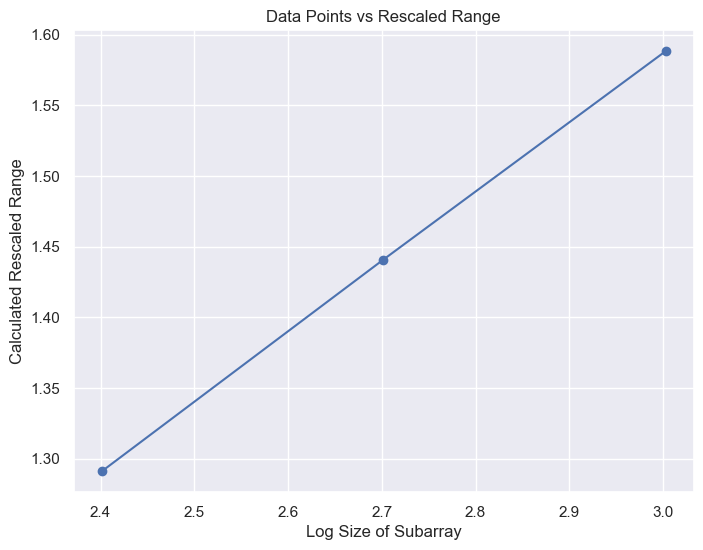

In [55]:
# Plot the line graph with dots for each data point
plt.plot(x_axis, y_axis, marker='o', linestyle='-')


# Add labels and title
plt.xlabel('Log Size of Subarray')
plt.ylabel('Calculated Rescaled Range')
plt.title('Data Points vs Rescaled Range')

# Show the plot
plt.show()

In [56]:
# Calculate H, which is the slope of the graph above

m, c = np.polyfit(x_axis, y_axis, 1)
print("Hearst coefficient is: ")
print(m)

Hearst coefficient is: 
0.4942043629633567
